In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the play.csv dataset
dataset = pd.read_csv("Dataset/cyber_crimes.csv")
dataset.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
0,1,State,Andhra Pradesh,616,931,1207,4.4,520.3,2.3
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5
2,3,State,Assam,696,1120,2022,7.4,340.4,5.9
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3
4,5,State,Chhattisgarh,90,171,139,0.5,284.7,0.5


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   S. No                                             36 non-null     int64  
 1   Category                                          36 non-null     object 
 2   State/UT                                          36 non-null     object 
 3   2016                                              36 non-null     int64  
 4   2017                                              36 non-null     int64  
 5   2018                                              36 non-null     int64  
 6   Percentage Share of State/UT (2018)               36 non-null     float64
 7   Mid-Year Projected Population (in Lakhs) (2018)+  36 non-null     float64
 8   Rate of Total Cyber Crimes (2018)++               36 non-null     float64
dtypes: float64(3), int64(4),

In [4]:
# Select the features for clustering
features = ['2016', '2017', '2018']
X = dataset[features]
X.head()

,2016,2017,2018
0,616,931,1207
1,4,1,7
2,696,1120,2022
3,309,433,374
4,90,171,139


In [5]:
# Preprocess the data by standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.46079996,  0.29947269,  0.30805449],
       [-0.56895404, -0.55601756, -0.51322136],
       [ 0.59540832,  0.47333039,  0.86583766],
       [-0.05575965, -0.15862854, -0.26204783],
       [-0.42425005, -0.39963762, -0.42288102],
       [-0.52352372, -0.54497898, -0.49816463],
       [ 0.0334184 , -0.13563149, -0.03756577],
       [ 0.09903997, -0.09331692, -0.23193438],
       [-0.52352372, -0.50542405, -0.47078877],
       [-0.52857153, -0.49898488, -0.46805119],
       [-0.13988987,  0.10537759,  0.11847664],
       [ 1.27686318,  2.362768  ,  3.47817924],
       [-0.09950736, -0.2625752 , -0.28531731],
       [-0.14157248, -0.10619527, -0.0115587 ],
       [ 3.42891442,  2.75831725,  1.8849041 ],
       [-0.55717581, -0.48886617, -0.49816463],
       [-0.51006288, -0.52106204, -0.46736679],
       [-0.57400185, -0.54773862, -0.51390575],
       [-0.57231925, -0.55693744, -0.51664334],
       [-0.04229881,  0.20104532,  0.05893415],
       [-0.40405879, -0.39503821, -0.354

In [6]:
# Initialize variables for elbow method (wcss: within-cluster sum of squares)
wcss = []
k_values = range(1, 6)  # Test k from 1 to 10

# Perform k-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

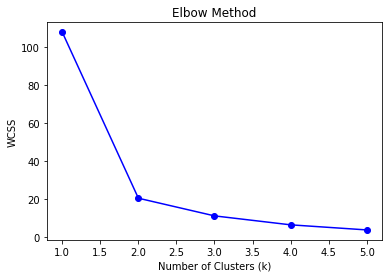

In [7]:
# Plot the elbow curve
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [8]:
# Determine the optimal value of k
elbow_point = np.diff(wcss) / np.diff(k_values)
optimal_k = k_values[np.argmax(elbow_point)]

In [9]:
# Fit the k-means model with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=5)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=5)

In [10]:
# Add cluster labels to the dataset
dataset['cluster_label'] = kmeans.labels_

In [11]:
# Visualize the clusters
plt.scatter(dataset['open'], dataset['close'], c=dataset['cluster_label'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('K-Means Clustering')
plt.show()

KeyError: 'open'

In [10]:
# Perform K-means clustering with a chosen number of clusters (K)
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('K-means Clustering')
plt.show()